In [34]:
import physics
import numpy as np
import matplotlib.pyplot as plt

In [35]:
auvDict = physics.simulate_auv2_motion(np.array([[50], [50], [-5], [5]]), np.pi/4, 1, 1, 1)

In [36]:
# def plot_auv2_motion(auvDict):
#     t = auvDict["Time"]
#     x = auvDict["XPosition"]
#     y = auvDict["YPosition"]
#     # theta = auvDict["angle"]
#     v = auvDict["velocity"]
#     omega = auvDict["angularVelocity"]
#     a = auvDict["acceleration"]

#     # plt.plot(t, theta, label="Angle" )
#     plt.plot(t, v, label="Velocity")
#     plt.plot(t, omega, label="Angular velocity")
#     plt.plot(t, a, label="Acceleration")
#     plt.xlabel("Time (s)")
#     plt.ylabel("Velocity (m/s), Acceleration (m/s^2), Heading (rad), Angular Velocity (rad/s), Angular Acceleration (rad/s^2)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

def plot_auv2_motion(auvDict):
    x = auvDict["XPosition"]
    y = auvDict["YPosition"]

    plt.plot(x, y)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("AUV Position")
    plt.grid(True)
    plt.xlim([-1000, 1000])
    plt.ylim([-1000, 1000])
    plt.show()

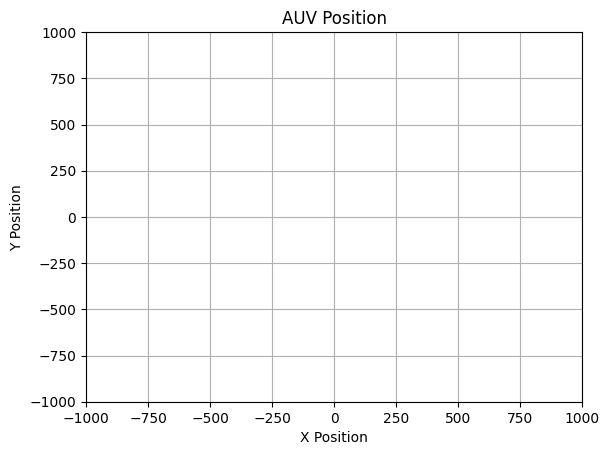

In [41]:
auvDict = physics.simulate_auv2_motion(np.array([[3], [3], [3], [3]]), np.pi/4, 1, 1, 1, 100, 0.1, 20)
plot_auv2_motion(auvDict)